<a href="https://colab.research.google.com/github/Kartikey7099/-Airbnb-Price-Analysis/blob/main/Airbnb_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv("listings.csv")

In [7]:
print("Initial Shape:", df.shape)
df.head()


Initial Shape: (37018, 79)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,https://www.airbnb.com/rooms/2539,20250501160219,2025-05-02,previous scrape,Superfast Wi-Fi. Clean & quiet home by the park,Renovated apartment home in an elevator buildi...,Close to Prospect Park and Historic Ditmas Park,https://a0.muscache.com/pictures/hosting/Hosti...,2787,...,5.0,4.75,4.88,NaN,f,5,1,4,0,0.08
1,2595,https://www.airbnb.com/rooms/2595,20250501160219,2025-05-02,city scrape,Skylit Midtown Manhattan Spacious Studio,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/miso/Hosting-...,2845,...,4.8,4.81,4.40,NaN,f,3,3,0,0,0.26
2,5136,https://www.airbnb.com/rooms/5136,20250501160219,2025-05-02,city scrape,Spacious Family Friendly Duplex w/ Patio + Yard,"We welcome you to stay in our lovely 2 br, 130...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,...,5.0,4.75,4.75,NaN,t,1,1,0,0,0.03
3,6848,https://www.airbnb.com/rooms/6848,20250501160219,2025-05-01,city scrape,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,https://a0.muscache.com/pictures/e4f031a7-f146...,15991,...,4.8,4.69,4.58,NaN,f,1,1,0,0,1.00
4,6872,https://www.airbnb.com/rooms/6872,20250501160219,2025-05-01,city scrape,Uptown Sanctuary w/ Private Bath (Month to Month),This charming distancing-friendly month-to-mon...,This sweet Harlem sanctuary is a 10-20 minute ...,https://a0.muscache.com/pictures/miso/Hosting-...,16104,...,5.0,5.00,5.00,NaN,f,2,0,2,0,0.03


In [11]:
columns_to_keep = [
    'id', 'name', 'host_id', 'host_name',  'neighbourhood',
    'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
    'number_of_reviews', 'reviews_per_month', 'availability_365', 'amenities']



In [12]:
df = df[df['price'].notnull() & df['reviews_per_month'].notnull()]

In [13]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

In [15]:
df = df[(df['price'] > 0) & (df['price'] < 1000)]
df = df[df['minimum_nights'] <= 365]


In [16]:
import ast

def count_amenities(amenities_str):
    try:
        amenities_list = ast.literal_eval(amenities_str)
        return len(amenities_list)
    except:
        return 0

df['amenities_count'] = df['amenities'].apply(count_amenities)

In [17]:
print("Cleaned Shape:", df.shape)
df.head()


Cleaned Shape: (14909, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,amenities,amenities_count
1,2595,Skylit Midtown Manhattan Spacious Studio,2845,Jennifer,Neighborhood highlights,40.75356,-73.98559,Entire home/apt,240.0,30,49,0.26,365,"[""Iron"", ""Cleaning available during stay"", ""TV...",32
2,5136,Spacious Family Friendly Duplex w/ Patio + Yard,7378,Rebecca,NaN,40.66265,-73.99454,Entire home/apt,216.0,30,4,0.03,37,"[""Iron"", ""Private patio or balcony"", ""Board ga...",44
3,6848,Only 2 stops to Manhattan studio,15991,Allen,NaN,40.70935,-73.95342,Entire home/apt,96.0,30,195,1.00,182,"[""Iron"", ""TV"", ""Free street parking"", ""Air con...",26
4,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kahshanna,Neighborhood highlights,40.80107,-73.94255,Private room,59.0,30,1,0.03,83,"[""Fire extinguisher"", ""Hangers"", ""Dryer"", ""Kit...",18
5,6990,UES Beautiful Blue Room,16800,Cynthia,Neighborhood highlights,40.78778,-73.94759,Private room,59.0,30,252,1.33,209,"[""Iron"", ""TV"", ""Free street parking"", ""Air con...",22


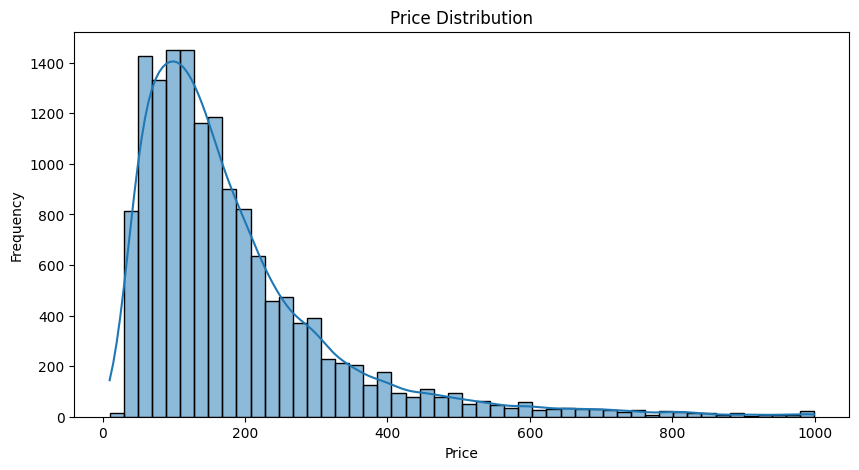

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

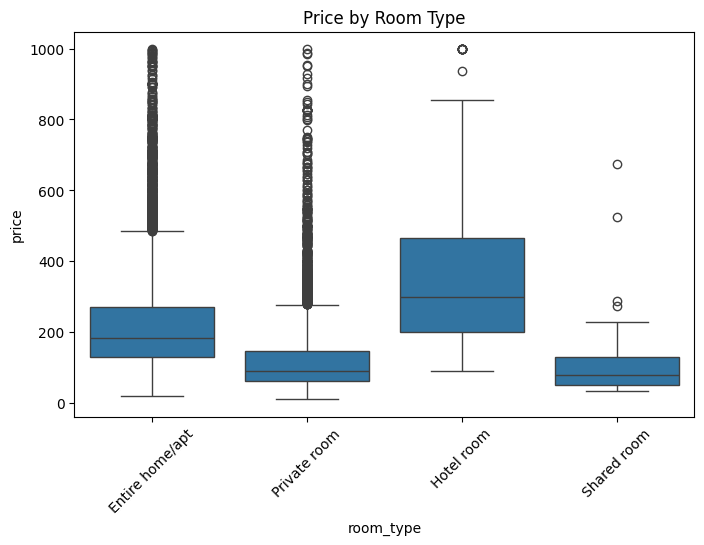

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='room_type', y='price')
plt.title("Price by Room Type")
plt.xticks(rotation=45)
plt.show()

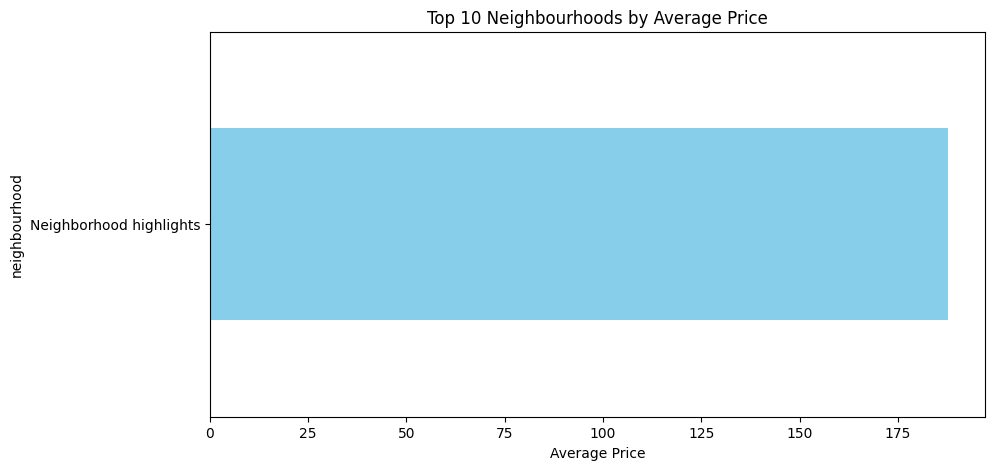

In [20]:
avg_price_neigh = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)[:10]
avg_price_neigh.plot(kind='barh', figsize=(10, 5), color='skyblue')
plt.title("Top 10 Neighbourhoods by Average Price")
plt.xlabel("Average Price")
plt.gca().invert_yaxis()
plt.show()

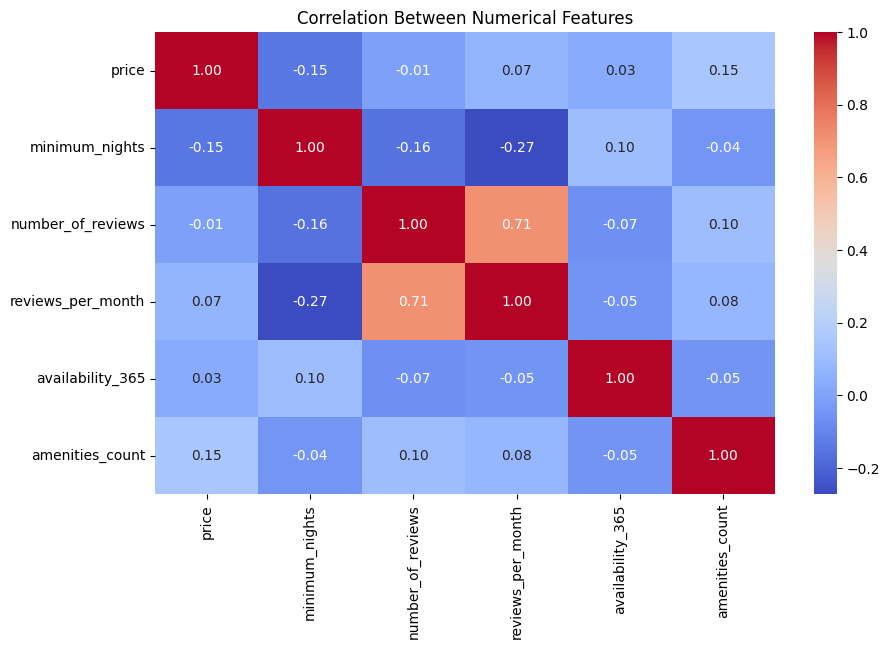

In [21]:
numeric_cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'amenities_count']
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Numerical Features")
plt.show()


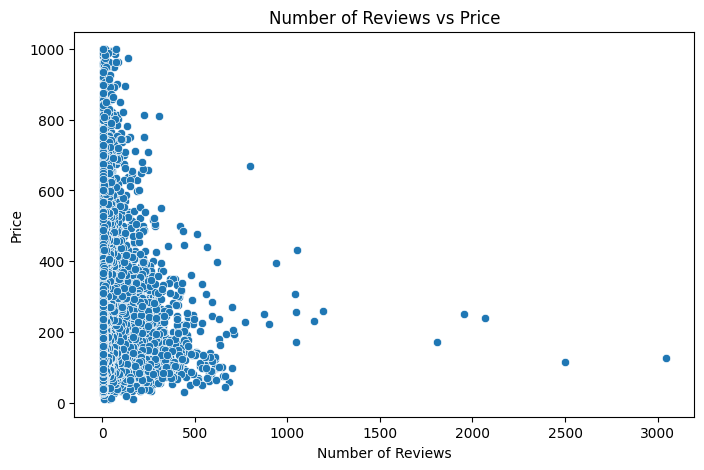

In [22]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='number_of_reviews', y='price')
plt.title("Number of Reviews vs Price")
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le_room = LabelEncoder()
df['room_type_encoded'] = le_room.fit_transform(df['room_type'])

In [26]:
neigh_freq = df['neighbourhood'].value_counts().to_dict()
df['neighbourhood_encoded'] = df['neighbourhood'].map(neigh_freq)

In [27]:
np.seterr(divide='ignore')  # Handle log(0) warning
df['log_price'] = np.log(df['price'])

In [28]:
with np.errstate(divide='ignore', invalid='ignore'):
    df['review_rate'] = df['number_of_reviews'] / df['availability_365']
    df['review_rate'].replace([np.inf, -np.inf], 0, inplace=True)
    df['review_rate'].fillna(0, inplace=True)


<ipython-input-28-2cc5b1de04ae>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['review_rate'].replace([np.inf, -np.inf], 0, inplace=True)
<ipython-input-28-2cc5b1de04ae>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [29]:
selected_features = [
    'latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
    'reviews_per_month', 'availability_365', 'amenities_count',
    'room_type_encoded', 'neighbourhood_encoded',
    'review_rate', 'log_price'
]

print("Engineered Features Sample:")
df[selected_features].head()


Engineered Features Sample:


,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,availability_365,amenities_count,room_type_encoded,neighbourhood_encoded,review_rate,log_price
1,40.75356,-73.98559,30,49,0.26,365,32,0,8904.0,0.134247,5.480639
2,40.66265,-73.99454,30,4,0.03,37,44,0,NaN,0.108108,5.375278
3,40.70935,-73.95342,30,195,1.00,182,26,0,NaN,1.071429,4.564348
4,40.80107,-73.94255,30,1,0.03,83,18,2,8904.0,0.012048,4.077537
5,40.78778,-73.94759,30,252,1.33,209,22,2,8904.0,1.205742,4.077537


In [34]:
import ast
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


In [35]:
print("NaNs in selected features before imputation:")
print(df[selected_features].isnull().sum())

NaNs in selected features before imputation:
latitude                    0
longitude                   0
minimum_nights              0
number_of_reviews           0
reviews_per_month           0
availability_365            0
amenities_count             0
room_type_encoded           0
neighbourhood_encoded    6005
review_rate                 0
log_price                   0
dtype: int64


In [36]:
X = df[selected_features].drop('log_price', axis=1)
y = df['log_price']

In [37]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns) # Convert back to DataFrame with original column names

In [38]:
print("\nNaNs in X after imputation:")
print(X.isnull().sum())


NaNs in X after imputation:
latitude                 0
longitude                0
minimum_nights           0
number_of_reviews        0
reviews_per_month        0
availability_365         0
amenities_count          0
room_type_encoded        0
neighbourhood_encoded    0
review_rate              0
dtype: int64


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [40]:
print("Linear Regression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R²:", r2_score(y_test, y_pred_lr))

Linear Regression Performance:
RMSE: 0.5489813008721168
R²: 0.3320556241822561


In [42]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [43]:
print("\nRandom Forest Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R²:", r2_score(y_test, y_pred_rf))


Random Forest Performance:
RMSE: 0.3996407496685831
R²: 0.6460314120448272


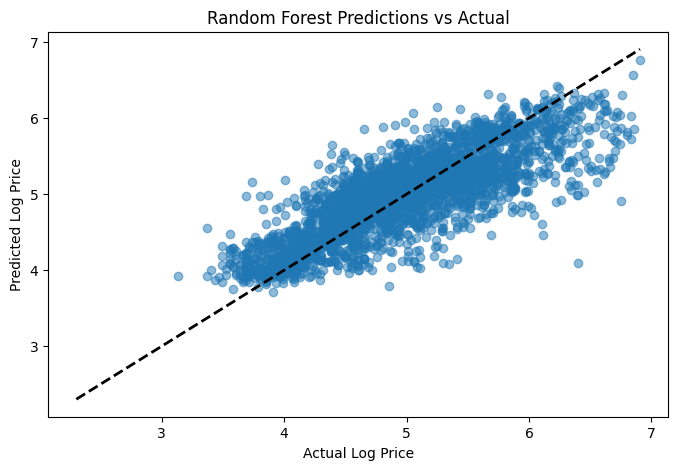

In [44]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Log Price")
plt.ylabel("Predicted Log Price")
plt.title("Random Forest Predictions vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()


In [45]:
expensive_neigh = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)
print("Top 10 Expensive Neighbourhoods:\n", expensive_neigh)

Top 10 Expensive Neighbourhoods:
 neighbourhood
Neighborhood highlights    187.702718
Name: price, dtype: float64


In [46]:
room_dist = df['room_type'].value_counts(normalize=True) * 100
print("\nRoom Type Distribution (%):\n", room_dist)



Room Type Distribution (%):
 room_type
Entire home/apt    57.649742
Private room       41.324032
Hotel room          0.630492
Shared room         0.395734
Name: proportion, dtype: float64


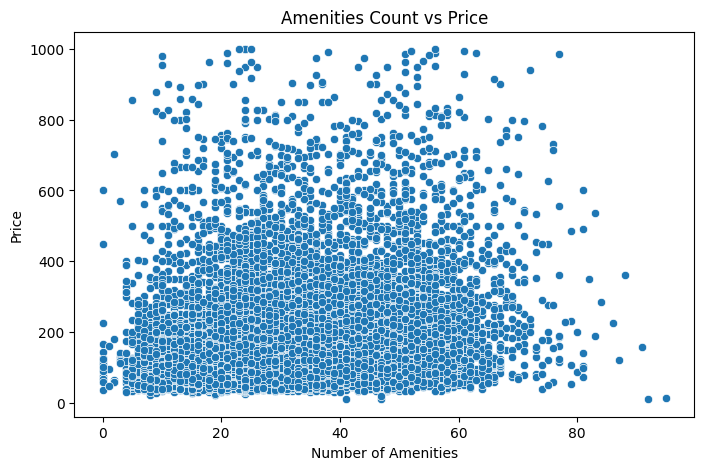

In [47]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='amenities_count', y='price')
plt.title("Amenities Count vs Price")
plt.xlabel("Number of Amenities")
plt.ylabel("Price")
plt.show()

In [48]:
high_bookings = df[(df['review_rate'] > 0.1) & (df['availability_365'] > 200)]
print("High Booking Listings Sample:")
print(high_bookings[['id', 'price', 'review_rate', 'availability_365']].head())

High Booking Listings Sample:
       id  price  review_rate  availability_365
1    2595  240.0     0.134247               365
5    6990   59.0     1.205742               209
15  46911   85.0     0.350711               211
16  49048   95.0     0.110236               254
30  54508   92.0     0.939815               216


In [49]:
high_booking_df = df[(df['review_rate'] > 0.2) & (df['availability_365'] > 300)]
print(f"\nHigh Booking Probability Listings: {high_booking_df.shape[0]} listings found")


High Booking Probability Listings: 858 listings found


In [50]:
top_review_rate = high_booking_df.sort_values(by='review_rate', ascending=False)[
    ['name', 'price', 'review_rate', 'availability_365']
].head(5)
print("\nTop 5 Listings by Review Rate:\n", top_review_rate)


Top 5 Listings by Review Rate:
                                                     name  price  review_rate  \
26367     Safe and Cozy Hostel Room, 1 person, Manhattan  126.0     8.607345   
19009               Untitled at 3 Freeman - Studio Queen  240.0     5.736111   
13958  Amazing Micro Unit W/ communal rooftop and kit...  252.0     5.663768   
22874    SoHo View Room (Full-Size Bed) in Hotel Comfort  173.0     4.983471   
13953          Beautiful Standard Full Room at The Ridge  258.0     3.574850   

       availability_365  
26367               354  
19009               360  
13958               345  
22874               363  
13953               334  


In [61]:
demand_df = df[df['availability_365'] > 300]
demand_neigh = demand_df.groupby('neighbourhood').agg({
    'review_rate': 'mean',
    'price': 'mean'
}).sort_values(by='review_rate', ascending=False).head(10)
print("\nTop 10 Neighbourhoods by Review Rate (High Demand):\n", demand_neigh)


Top 10 Neighbourhoods by Review Rate (High Demand):
                          review_rate       price
neighbourhood                                   
Neighborhood highlights     0.159968  197.359056
